* Binary Classification Technique
* Predicts the line which separates data into two classes
* Sigmoid function output is between 0 & 1
* this transforms linear output into 0 & 1 using sigmoid function.
* Generally, above 0.5 means one class & below 0.5 means another class

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from sklearn import datasets
from sklearn.preprocessing import normalize
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [38]:
bc = datasets.load_breast_cancer()

In [39]:
bc.data.shape

(569, 30)

In [40]:
#x_vals = bc.data[:,np.newaxis]
x_vals = bc.data

In [41]:
y_vals = bc.target

In [42]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [43]:
batch_size = 25
x_data = tf.placeholder(shape=[None, 30], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[30,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [44]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(model_output, y_target))

init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [45]:
prediction = tf.round(tf.sigmoid(model_output))

predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [46]:
loss_vec = []
train_acc = []
test_acc = []
for i in range(2000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)

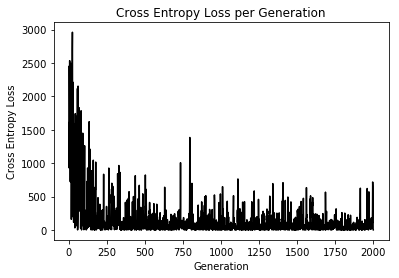

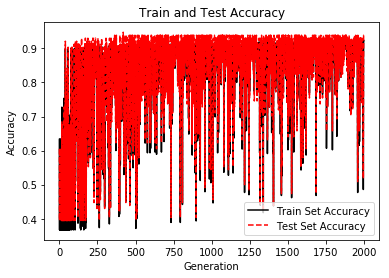

In [47]:
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [50]:
np.argmax(train_acc)

1832

In [51]:
train_acc[1832]

0.92747253